---

## Project Instruction

- Please rename this file so that you know which copy you have been working in. Keep a copy safe (especially if you are working in the online Jupyter service), for instance you could store your work on GitLab. You can download a copy by choosing -File- then -Download as- Notebook from the menu above. 
- Make sure your code is readable, organised, and commented appropriately.


## Team working 

Firstly agree amongst yourself how you are to work together as a group. 
- When will you meet? or will you work remotely from each other?
- How are you going to share code?
- How will you divide tasks?
- Who will present the final notebook, who will upload?
- When are you planning to work on the project?

The following tasks are all open-ended, so you should plan to work on them and investigate the problems raised and think about what you wish to cover. Because the task is open-ended you don't need to talk about every aspect of the problem to get a good mark - you should aim to present a coherent and well coded investigation into some aspects of each task though. The listed questions are a guide to some things you could think about to get you started, you don't need to answer them all, and you can certainly answer questions that are not listed.

When you are presenting your investigation of each problem, be sure to make a coherent discussion for each task (using markdown, maths as appropriate and code cells). In particular, since you are working as a group some work will be needed to make a single written response to the task combining all of the code and writing that you each contribute - this is something that you should plan to do and the quality of presentation will be marked.

## Task 1 - Analysing the product reviews

In this project, you are supposed to analyse product reviews and extract helpful information from them. The case we are studying here is the review dataset of women’s clothes that are sold by a company online. In the file `WomensApparelReviews.csv`, you are given over 23000 reviews that are real but anonymized. The columns of this dataset are the following variables:


**Product ID**: integer variable that refers to the specific item that is reviewed.

**Age**: the reviewers age.

**Title**: the title picked by the reviewer (some reviewers didn't pick any titles).

**Review Text**: the body text of the review.

**Rating**: the product score given by the customer from 1 (worst), to 5 (best).

**Is it Recommended?**: the customers are asked whether or not they recommend the product. 1 means the product is recommended, 0 means not recommended.

**Department**: the products are classified in different departments such as dress, top and ...

A major part of this task is analysing the review text and deciding how positive or negative it is. To that end, there are two more data files: `positive-words.txt` and `negative-words.txt`, which contain lists of positive and negative words, respectively. These words come from the paper by *Minqing Hu and Bing Liu. "Mining and summarizing customer reviews." Proceedings of the ACM SIGKDD International Conference on Knowledge Discovery & Data Mining, Seattle, Washington, USA, Aug 22-25, 2004*. You will need to invent a metric for how positive or negative "Review Text" is, based on how many of the words in it are in the positive/negative word lists. For instance, is a review containing one positive and one negative word: overall positive, negative or neutral? - try and develop a single measure based on the word occurrences that will describe the positivity/negativity of the review. You can also decide if a "Title" is positive, negative or neutral by searching for them in the lists of positive and negative words. Once you have developed one positivity/negativity measure can you think of other measures that you could compare?

This project is open-ended, so you can come up with your own ideas to analyse the dataset and extract useful information or interesting facts. However at least one of the ideas you present should make use of the positive and negative word lists for analysing the reviews text. Here are some questions you might address in your analysis (of course you are not limited to just these questions):

- What is the age distribution of customers?
- What is the most popular item in each age group? (you can classify the ages however you think appropriate - be sure to justify what you do).
- Using the measure of negativity or positivity that you define, rate the reviews. You can also decide whether a title is positive or negative. Are the negativity-positivity of the titles and that of the review texts correlated? 
- What is the average rating in positive, negative or neutral reviews?
- Is the rating correlated to your measure of negativity-positivity? 
- Are there many outliers who wrote a negative text but left a high rating (or vice versa)?
- Which product attracted the most positive reviews? This would help the company to focus more on the product that people liked or make changes to the product that people did not like. Is there any such advice you could give them on the products that could come from the reviews?
- What is the most recommended product? What is the least recommended product?
- Which group of reviewers wrote a longer text in their review? Do unhappy customers write longer reviews or satisfied customers? 
- Which age group uses more positive words? Which age group uses more negative words?
- Are older people more inclined to recommend a product or younger people?
- Is it true that unhappy customers use more capital letters? or it is the other way around?
- Can you come up with a way to consider the positive words in a negative statement negative? For example, "Not impressed or satisfied" is a negative title, but if you just count the positive and negative words, you will find two positive words ("impressed" and "satisfied") and a negative word ("not"). Hence, just based on the word count, you might wrongly find the title to be positive. This might be easier for the titles, but you can also break down the review text to sentences and apply your method there.


## Task 2 - Analysing transportation data

In this task, you should analysing the cycling trips in Edinburgh in September 2019 collected in `cyclingtrips_Sep2019.csv`. This dataset is kindly supplied for use by Edinburgh Cycle Hire under the [Open Government License (OGL) v3.0](https://www.nationalarchives.gov.uk/doc/open-government-licence/version/3/). You can extend your analysis to other months by downloading data from [this link](https://edinburghcyclehire.com/open-data/historical). 

As a part of this task you should visualise some aspects of the data geographically on a map. There are several different libraries and packages that you can use for this purpose. Below, I walk you through the installation and the basic usage of **folium**, but you are welcome to use any other geographical visualisation tools like `googlemaps` and `gmplot`. You can also find more about the folium library [here](https://python-visualization.github.io/folium/) and implement more advanced features of it in your project.

First, you need to install the library before importing it. The following cell does it for you in `Noteable` or a regular `Jupyter Notebook`:
 

In [2]:
import sys
!{sys.executable} -m pip install folium

Once you installed folium, you should import it and give it a starting coordinate

In [8]:
import folium

#this is for just clearing the map after doing to much to it
def newmap():
    m = folium.Map(
        location=[55.924550, -3.176920],
        zoom_start=15
    )
    return m

In the cell above, I gave the latitude and longitude of Murchison House as the starting location to folium. I also set the initial zoom to 15. You can change this coordinate as well as the zooming and observe the results. To display the map in a Jupyter notebook, you just need to ask for the object representation (simply typing `"m"` for the above map):

In [4]:
m = newmap()
m

I can mark the Murchison House on the map by a circle with `radius=50`

In [5]:
folium.CircleMarker(
    location=[55.924550, -3.176920],
    radius=50,
    color='blue',
    fill=True,
    fill_color='blue'
).add_to(m)

m

Using this tool, we want to visualise how busy the stations are as destinations or starting points of cycling trips. After dividing the cycling trips into morning and afternoon/evening trips, show how many of them end in or start from a particular station. You can do this by drawing a radius proportional to the number of trips. You can also separate the stations as destinations or starting points by drawing them on different maps or by colour-coding them.

Just like the first task, this is an open-ended problem. You can address the following or any other interesting questions about bike trips:

- What was the average journey time and distance of bike trips on weekdays? What about weekends?
- What was the most common time(s) of day for journeys to be undertaken?
- Which areas do you suggest for building the new stations based on your analysis?
- Can you visualise which stations were used mostly for shorter trips and which one for longer trips?
- Can you compare the statistics of different months in summer? Is there any remarkable difference between them?

There is more open data available for other cities - here is the link for the data on the similar bike hire scheme in London ([TFL open data](https://cycling.data.tfl.gov.uk)), and for New York [here](https://www.citibikenyc.com/system-data). You could also think about some of the issues involved in other cities and bike share schemes, and perform similar sorts of analyses or comparisons. For example:

- Do bike hire schemes share popular times of day?
- Can you trace the common commute patterns of different cities? Are there any commonalities of shape or structure to the patterns?
- How does the average rental time compare across different cities? How does that time change as the size of the city changes?

In [3]:
import pandas as pd
cycle_data = pd.read_csv("cyclingtrips_Sep2019.csv")




In [31]:
import numpy as np
import math
import datetime
from datetime import datetime, timedelta

def hour_rounder(t):
    # Rounds to nearest hour by adding a timedelta hour if minute >= 30
    rounded_to_hour = (t.replace(second=0, microsecond=0, minute=0, hour=t.hour)
               +timedelta(hours=t.minute//30))
    return rounded_to_hour.time()

def time_of_day(time):
    minute = time.time()
    noon = datetime(1000, 1,1, 1).time()
    if(minute<noon):
        return "Morning"
    else:
        return "Afternoon"
    
popup = folium.Popup()
cycle_data['started_at'] =  pd.to_datetime(cycle_data['started_at'])    
cycle_data["start_time_factor"] = cycle_data["started_at"].apply(lambda x: time_of_day(x))
cycle_data['Location'] = list(zip(cycle_data.start_station_latitude, cycle_data.start_station_longitude))
#Create dictionary that associates station ids to coordinates
stations = cycle_data[["start_station_name",  "start_station_latitude","start_station_longitude"]]
stations_dict = stations.set_index("start_station_name").T.to_dict("list")

print(cycle_data.start_station_name.values)

#create seperate variables for unique locations and how oftain they appear
f, u = pd.factorize(cycle_data.start_station_name.values)
counts = np.bincount(f)
radius = [] 
m = newmap()
#give stations a radius based on how often they appear
for i in range(len(u)):
    radius.append(int(math.ceil(counts[i] / 50)))
keys = list(stations_dict)
for i in range(len(u)):
    folium.CircleMarker(
            location=stations_dict[u[i]],
            radius=radius[i],
            color='blue',
            fill=True,
            fill_color='blue',
            popup= keys[i]
        ).add_to(m)

    
m


C:\Users\s1997003\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:26: UserWarning: DataFrame columns are not unique, some columns will be omitted.


['Lothian Road' 'The Tron' 'Bruntsfield links' ... 'Bruntsfield links'
 'Bruntsfield links' 'Bruntsfield links']


C:\Users\s1997003\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  from ipykernel import kernelapp as app
C:\Users\s1997003\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\s1997003\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


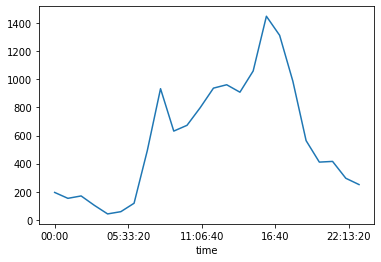

In [12]:
import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime, timedelta


def hour_rounder(t):
    # Rounds to nearest hour by adding a timedelta hour if minute >= 30
    rounded_to_hour = (t.replace(second=0, microsecond=0, minute=0, hour=t.hour)
               +timedelta(hours=t.minute//30))
    return rounded_to_hour.time()



#Create dictionary that associates station ids to coordinates
stations = cycle_data[["start_station_id",  "start_station_latitude","start_station_longitude"]]
stations_dict = stations.set_index("start_station_id").T.to_dict("list")

#create seperate variables for station id and how oftain they appear
rent_time = cycle_data[["started_at"]]
rent_time['started_at'] =  pd.to_datetime(rent_time['started_at'])
rent_time['started_at'] = rent_time['started_at'].apply(lambda t: hour_rounder(t))
f, u = pd.factorize(rent_time.started_at.values)
counts = np.bincount(f)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)  
 
ax.plot(u, counts)
#ax.xaxis.set_major_locator(mdates.MinuteLocator())  
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))  

plt.show()



C:\Users\s1997003\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\s1997003\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


[Text(0, 0, 'Monday'),
 Text(0, 0, 'Tuesday'),
 Text(0, 0, 'Wednesday'),
 Text(0, 0, 'Thursday'),
 Text(0, 0, 'Friday'),
 Text(0, 0, 'Saturday'),
 Text(0, 0, 'Sunday')]

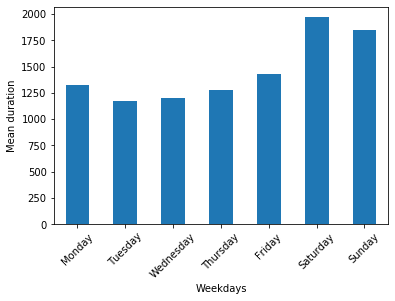

In [41]:
duration = cycle_data[["duration","started_at"]]
duration['started_at'] =  pd.to_datetime(duration['started_at'])

duration['started_at'] = duration['started_at'].apply(lambda t: t.weekday())
avg_duration = duration.groupby('started_at').mean()



ax = avg_duration.plot.bar(legend=False)
ax.set_xlabel("Weekdays")
ax.set_ylabel("Mean duration")
ax.set_xticklabels(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"], rotation=45)



In [48]:
d = datetime(1,1,1,5)
print(d.time())

05:00:00


In [16]:
import statistics

#First find the mean journey length to each station and store the new dataframe in variable mean_duration
destination_duration = cycle_data[['duration', 'end_station_name',"end_station_latitude","end_station_longitude"]]
mean_duration = destination_duration.groupby(['end_station_name']).mean()

#Create dictionary that associates mean journey times to that station to station coordinates
destination_dict = mean_duration.set_index("duration").T.to_dict("list")



#give stations a radius based on the average journey to that station
radius = [] 
m = newmap()
for i in range(len(mean_duration)):
    radius.append(int(math.ceil(mean_duration.iloc[i][0] / 500)))
    
for i in range(len(mean_duration)):
    folium.CircleMarker(
            location=destination_dict[(mean_duration.iloc[i][0])],
            radius=radius[i],
            color='blue',
            fill=True,
            fill_color='blue'
        ).add_to(m)

'''
Discussion
As can be seen from the map below, the stations further out have longer journey times. This is to be expected.'''

m